In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('UnderSample_1.csv')

In [3]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["text"])
sequences = tokenizer.texts_to_sequences(data["text"])

# pad the sequences
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [4]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data["sentiment"], test_size=0.33, random_state=0)

In [5]:
# # oversample the minority class (positive examples) using SMOTE
# sm = SMOTE(sampling_strategy='minority',random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)


In [6]:
# create the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# create the BiLSTM model
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(1, activation='sigmoid'))

In [8]:
# compile the model LSTM
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# compile the model BiLSTM
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# train the model LSTM
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test), callbacks=[early_stopping]) #, callbacks=[early_stopping]




Epoch 1/7
168/168 [==============================] - 19s 98ms/step - loss: 0.5510 - accuracy: 0.7181 - val_loss: 0.4538 - val_accuracy: 0.7927
Epoch 2/7
168/168 [==============================] - 15s 90ms/step - loss: 0.2574 - accuracy: 0.8943 - val_loss: 0.4592 - val_accuracy: 0.8150
Epoch 3/7
168/168 [==============================] - 15s 90ms/step - loss: 0.0956 - accuracy: 0.9678 - val_loss: 0.5420 - val_accuracy: 0.8078


In [11]:
# train the model BiLSTM
early_stopping2 = EarlyStopping(monitor='val_loss', patience=2)
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test), callbacks=[early_stopping]) #callbacks=[early_stopping]


Epoch 1/7
168/168 [==============================] - 12s 49ms/step - loss: 0.5501 - accuracy: 0.7131 - val_loss: 0.4480 - val_accuracy: 0.7870
Epoch 2/7
168/168 [==============================] - 7s 44ms/step - loss: 0.2483 - accuracy: 0.8997 - val_loss: 0.4490 - val_accuracy: 0.8078
Epoch 3/7
168/168 [==============================] - 7s 45ms/step - loss: 0.0844 - accuracy: 0.9719 - val_loss: 0.6007 - val_accuracy: 0.8108


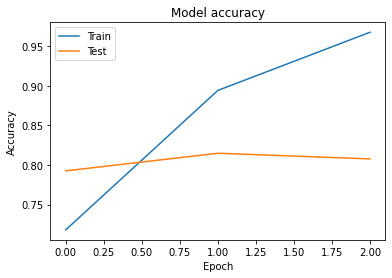

In [12]:
# LSTM visualize the accuracy and loss of the training and test sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


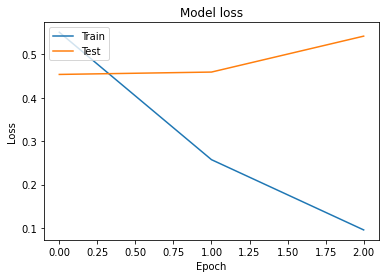

In [13]:
# LSTM
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

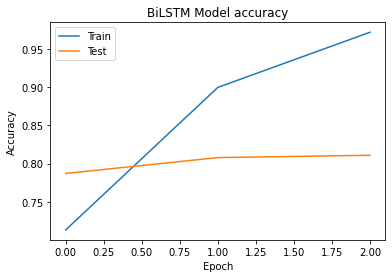

In [14]:
# BiLSTM visualize the accuracy and loss of the training and test sets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('BiLSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


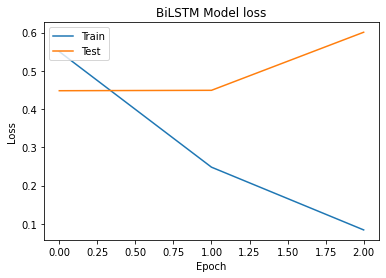

In [15]:
# BiLSTM 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('BiLSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Check for scores

In [16]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

## LSTM

In [17]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Round the predictions to the nearest class label
predicted_labels = np.round(predictions)

83/83 [==============================] - 1s 12ms/step


In [18]:
# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predicted_labels, average='binary')

# Print the results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.8598781549173194
Recall:  0.7395209580838323
F1-Score:  0.7951710261569417


In [19]:
accuracy = accuracy_score(y_test, predicted_labels)
print('Accuracy:', accuracy)

Accuracy: 0.8077794561933535


In [20]:
# get the confusion matrix
conf = confusion_matrix(y_test, predicted_labels)
print(conf)

[[1151  161]
 [ 348  988]]


## BiLSTM

In [21]:
# Make predictions on the test data
predictions = model2.predict(X_test)

# Round the predictions to the nearest class label
predicted_labels2 = np.round(predictions)

83/83 [==============================] - 1s 8ms/step


In [22]:
# Calculate precision, recall, f1-score, and support
precision2, recall2, f1_score2, _ = precision_recall_fscore_support(y_test, predicted_labels2, average='binary')

# Print the results
print("Precision: ", precision2)
print("Recall: ", recall2)
print("F1-Score: ", f1_score2)

Precision:  0.8218966846569006
Recall:  0.7979041916167665
F1-Score:  0.8097227497151538


In [23]:
accuracy = accuracy_score(y_test, predicted_labels2)
print('Accuracy:', accuracy)

Accuracy: 0.8108006042296072


In [24]:
# get the confusion matrix
cf2 = confusion_matrix(y_test, predicted_labels2)
print(cf2)

[[1081  231]
 [ 270 1066]]


In [25]:
model.save('LSTM_model.h5')

In [26]:
model2.save('BiLSTM_model.h5')